<a href="https://colab.research.google.com/github/PriankaKibria17/Machine-Learning/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project II, Part II: Spotify

Prianka Kibria

4.14.22


This data contains songs that have been played most frequently and have reached the Top 200 Weekly Global charts of spotify.



In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector

In [55]:
spotify = pd.read_csv('/content/drive/MyDrive/data/spotify_dataset.csv')
spotify.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [56]:
# There are 3 integer columns and the rest are objects. The data types of some of the numeric columns will have to be changed.
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [57]:
#No duplicates
spotify.duplicated().sum()

0

In [58]:
#Dropping unneccessary columns with either no distributing values or unique values that are not needed
spotify.drop(columns = ['Index', 'Song ID', 'Chord', 'Week of Highest Charting', 'Weeks Charted'], inplace = True)

Changing the data type for: 

- streams
- aritst followers
- danceability
- energy
- loudness
- speechiness
- acousticness
- liveness
- tempo
- duration
- valence

Changing the object columns that are numeric.

In [59]:
#removing the the commas in streams
#Code ref: Stackedoverflow
spotify.Streams = spotify.Streams.apply(lambda Streams : Streams.replace(',', ''))

In [60]:
spotify['Streams'] = spotify['Streams'].astype('int')

In [61]:
Allobjectcolumns = ['Artist Followers', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
#code ref for loop: Stackedoverflow + Kaggle
for each_col in Allobjectcolumns:
  spotify[each_col] = pd.to_numeric(spotify[each_col], errors = 'coerce')

In [62]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Song Name                  1556 non-null   object 
 3   Streams                    1556 non-null   int64  
 4   Artist                     1556 non-null   object 
 5   Artist Followers           1545 non-null   float64
 6   Genre                      1556 non-null   object 
 7   Release Date               1556 non-null   object 
 8   Popularity                 1556 non-null   object 
 9   Danceability               1545 non-null   float64
 10  Energy                     1545 non-null   float64
 11  Loudness                   1545 non-null   float64
 12  Speechiness                1545 non-null   float64
 13  Acousticness               1545 non-null   float

In [63]:
#identifying null columns
spotify.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Genre                         0
Release Date                  0
Popularity                    0
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
dtype: int64

In [64]:
#removing all null values since I the numeric columns are imperative
spotify = spotify.dropna()
#spotify.isnull().sum()

#Exploratory

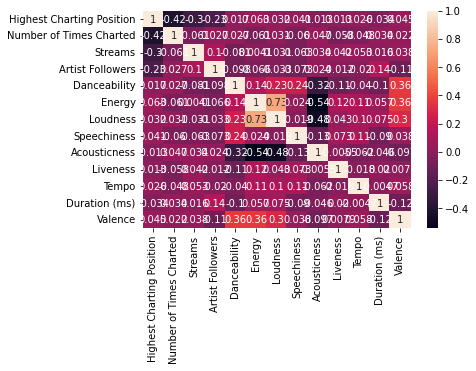

In [65]:
sns.heatmap(spotify.corr(), annot = True)

Noteworthy correlations:

Highest charting and energy has a high positive correlation

Number of times charted and energy has a high positive correlation

Streams and Danceability has a high positive correlation

Artist followers and speechiness has a high positive correlation

Danceability and valence has a high positive correlation

etc.

# univariate visuals

In [66]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Song Name                  1545 non-null   object 
 3   Streams                    1545 non-null   int64  
 4   Artist                     1545 non-null   object 
 5   Artist Followers           1545 non-null   float64
 6   Genre                      1545 non-null   object 
 7   Release Date               1545 non-null   object 
 8   Popularity                 1545 non-null   object 
 9   Danceability               1545 non-null   float64
 10  Energy                     1545 non-null   float64
 11  Loudness                   1545 non-null   float64
 12  Speechiness                1545 non-null   float64
 13  Acousticness               1545 non-null   float

Columns With Numeric Values:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


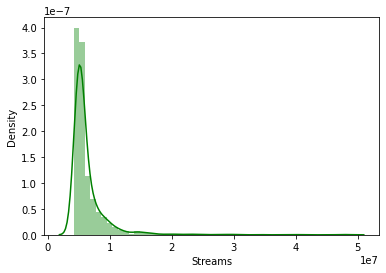

In [67]:
#We can see a large portion of the data is between 0.5-1.
sns.distplot(spotify.Streams, hist=True, kde=True, color='g');
plt.show()

The target has some outliers beyond its max of 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


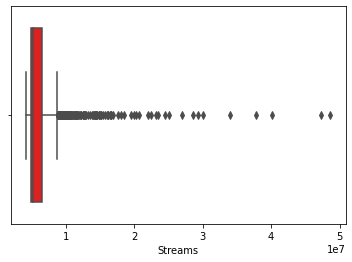

In [68]:
sns.boxplot(spotify.Streams, color='r')

These are top ten streams, most of the data is located between 0-1

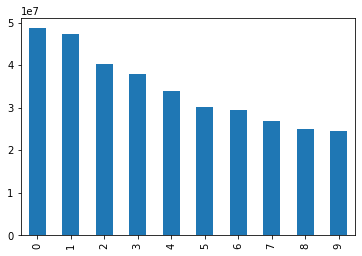

In [69]:
#target
spotify['Streams'].head(10).plot.bar()

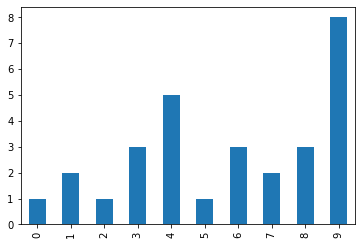

In [70]:
spotify['Highest Charting Position'].head(10).plot.bar()

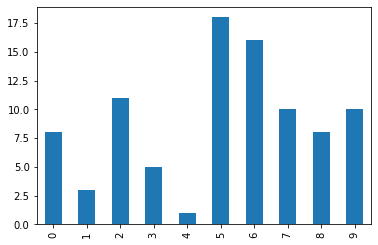

In [71]:
spotify['Number of Times Charted'].head(10).plot.bar()

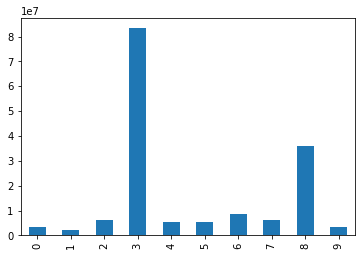

In [72]:
spotify['Artist Followers'].head(10).plot.bar()

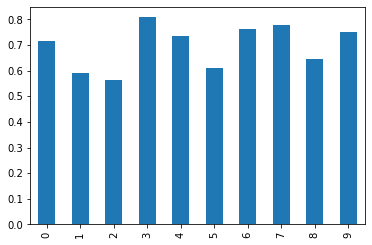

In [73]:
spotify['Danceability'].head(10).plot.bar()

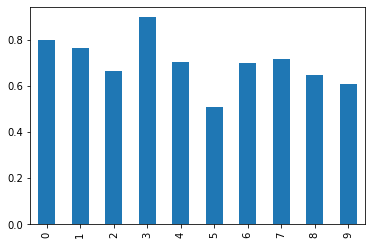

In [74]:
spotify['Energy'].head(10).plot.bar()

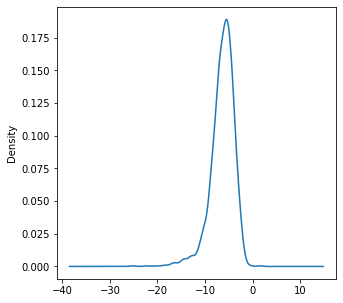

In [75]:
plt.figure(figsize = (5,5))
spotify['Loudness'].plot(kind='density')

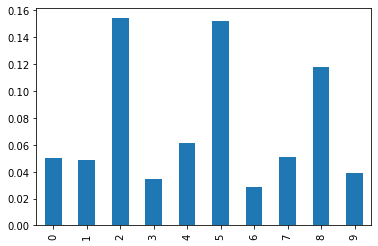

In [76]:
spotify['Speechiness'].head(10).plot.bar()

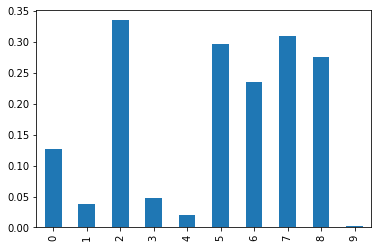

In [77]:
spotify['Acousticness'].head(10).plot.bar()

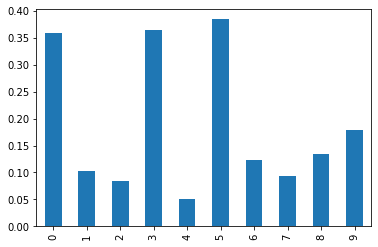

In [78]:
spotify['Liveness'].head(10).plot.bar()

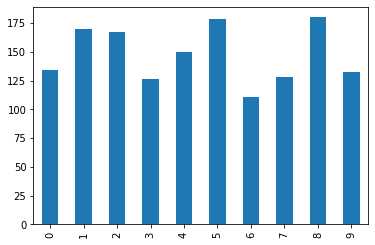

In [79]:
spotify['Tempo'].head(10).plot.bar()

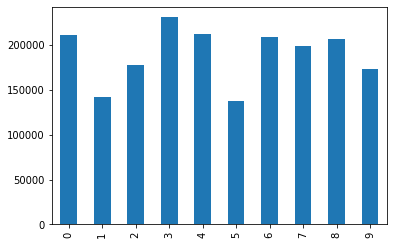

In [80]:
spotify['Duration (ms)'].head(10).plot.bar()

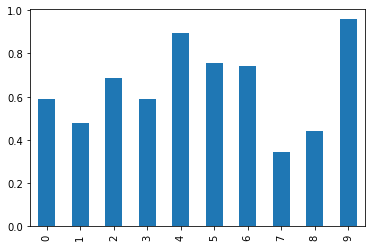

In [81]:
spotify['Valence'].head(10).plot.bar()

Nominal Categories

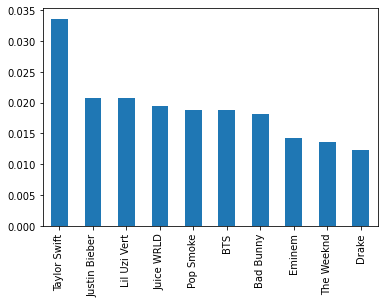

In [82]:
(spotify['Artist'].value_counts().head(10)/len(spotify)).plot.bar()

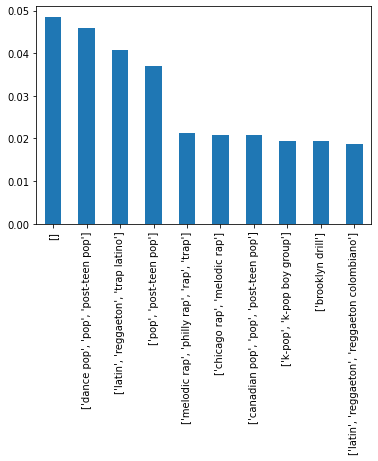

In [83]:
(spotify['Genre'].value_counts().head(10)/len(spotify)).plot.bar()

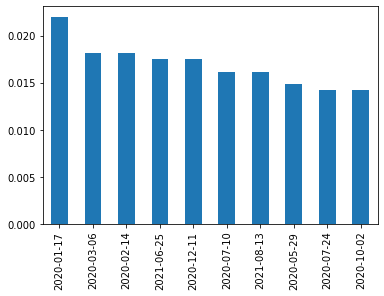

In [84]:
(spotify['Release Date'].value_counts().head(10)/len(spotify)).plot.bar()

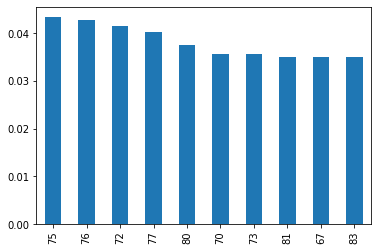

In [85]:
(spotify['Popularity'].value_counts().head(10)/len(spotify)).plot.bar()